In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /home/ashiley/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /home/ashiley/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /home/ashiley/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /home/ashiley/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /home/ashiley/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /home/ashiley/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /home/ashiley/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /home/ashiley/.pytorch/F_MNIST_data/FashionMNIST/raw



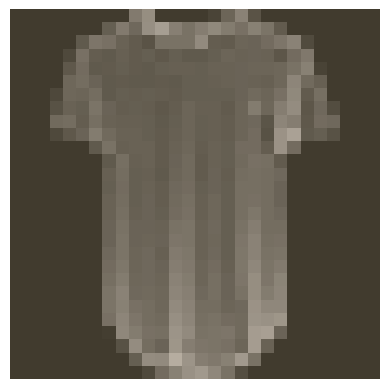

In [5]:

image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [8]:
from torch import nn

# Imprime as dimensões do tensor image
print(image.shape)


torch.Size([64, 1, 28, 28])


64: Isso indica o tamanho do lote (batch size), ou seja, temos 64 imagens sendo processadas simultaneamente em cada iteração.

1: Indica o número de canais de cor das imagens. Neste caso, como estamos lidando com imagens em escala de cinza, temos apenas um canal de cor.

28: É a altura das imagens.

28: É a largura das imagens.

In [ ]:
#descobrindo as dimensoes para definir a arquitetura da rede neural

In [28]:
# TODO: Define your network architecture here
'''
model = nn.Sequential(
    nn.Linear(784, 392),  # 28 * 28 = 784, 392 = 784/2
    nn.ReLU(),
    nn.Linear(392, 196),
    nn.ReLU(),
    nn.Linear(196,98),
    nn.ReLU(),
    nn.Linear(98, 49),
    nn.ReLU(),
    nn.Linear(49, 10),nn.LogSoftmax(dim=1)  # Log-softmax para obter as probabilidades
)
'''

import torch.nn.functional as F

# TODO: Define your network architecture here
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x



In [13]:
''''''
# TODO: Create the network, define the criterion and optimizer
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [14]:
# TODO: Train the network here
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5384916307480097
Training loss: 0.39787507575871084
Training loss: 0.36109521744379613
Training loss: 0.3377724743680532
Training loss: 0.31696309212015383


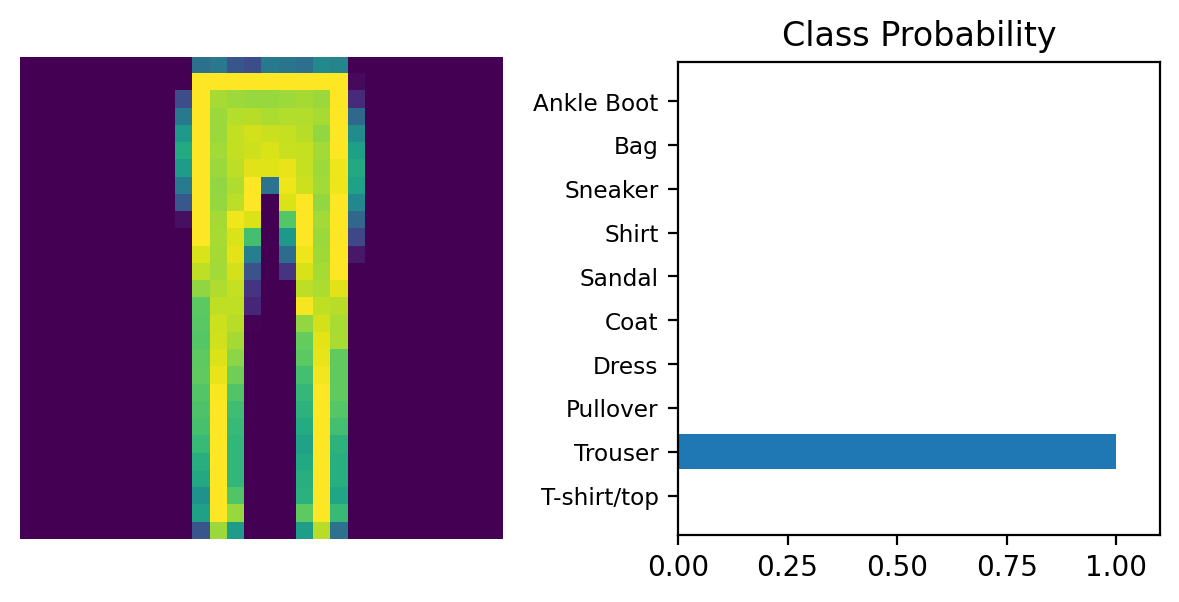

In [27]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')